## Import Dependencies


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Dataset


In [189]:
file_path = 'Heart_Disease dataset.xlsx'  
df = pd.read_excel(file_path)
display(df.head())


,ID,Age,Gender,Troponin C,Troponin C Classification,Creatine Kinase,Creatine Kinase Classification,Ejection Fraction,Ejection Fraction Status,Artery Blockage (%),Smoking,Alcohol,Heart Disease
0,1,68,0,4.65,Abnormal,118.6,Normal,61.20,Normal,37.45,0,0,0
1,2,58,0,0.00,Normal,1274.4,Abnormal,59.49,Abnormal,95.07,1,1,1
2,3,44,1,46.87,Abnormal,1357.6,Abnormal,74.10,Normal,73.20,1,1,1
3,4,72,0,40.10,Abnormal,183.6,Normal,71.99,Normal,59.87,0,0,0
4,5,37,1,0.01,Normal,55.2,Normal,51.38,Abnormal,15.60,1,1,1


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Troponin C'}>],
       [<Axes: title={'center': 'Troponin C Classification'}>,
        <Axes: title={'center': 'Creatine Kinase'}>,
        <Axes: title={'center': 'Creatine Kinase Classification'}>,
        <Axes: title={'center': 'Ejection Fraction'}>],
       [<Axes: title={'center': 'Ejection Fraction Status'}>,
        <Axes: title={'center': 'Artery Blockage (%)'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'Heart Disease'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

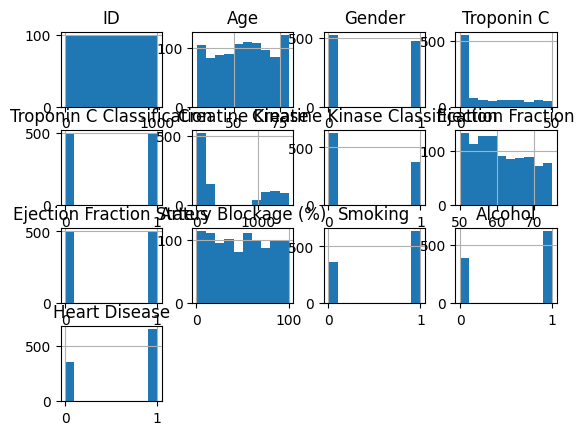

In [201]:
df.hist()

In [190]:
# Encode categorical variables 
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

In [191]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                                0
Age                               0
Gender                            0
Troponin C                        0
Troponin C Classification         0
Creatine Kinase                   0
Creatine Kinase Classification    0
Ejection Fraction                 0
Ejection Fraction Status          0
Artery Blockage (%)               0
Smoking                           0
Alcohol                           0
Heart Disease                     0
dtype: int64


In [192]:
X = df.drop(columns=['Heart Disease']) 
y = df['Heart Disease']
drop_cols = ["ID"]
X = X.drop(columns=drop_cols)

print("Feature Matrix (X):")
display(X.head())

print("\nTarget Variable (y):")
display(y.head())

Feature Matrix (X):


,Age,Gender,Troponin C,Troponin C Classification,Creatine Kinase,Creatine Kinase Classification,Ejection Fraction,Ejection Fraction Status,Artery Blockage (%),Smoking,Alcohol
0,68,0,4.65,0,118.6,0,61.20,0,37.45,0,0
1,58,0,0.00,1,1274.4,1,59.49,1,95.07,1,1
2,44,1,46.87,0,1357.6,1,74.10,0,73.20,1,1
3,72,0,40.10,0,183.6,0,71.99,0,59.87,0,0
4,37,1,0.01,1,55.2,0,51.38,1,15.60,1,1



Target Variable (y):


0    0
1    1
2    1
3    0
4    1
Name: Heart Disease, dtype: int64

Heart Disease                     1.000000
Smoking                           0.820461
Alcohol                           0.809020
Troponin C Classification         0.743502
Ejection Fraction Status          0.743502
Creatine Kinase                   0.431471
Artery Blockage (%)               0.388730
Creatine Kinase Classification    0.381477
Age                               0.013918
Gender                            0.007859
Troponin C                       -0.543561
Ejection Fraction                -0.616220
Name: Heart Disease, dtype: float64


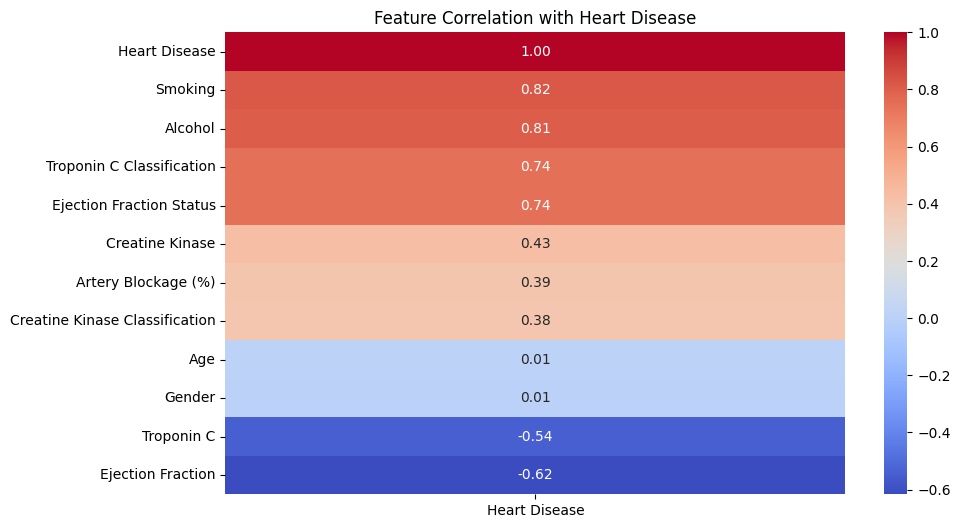

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = X.join(y).corr()

# Display correlation of features with target
print(correlation['Heart Disease'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['Heart Disease']].sort_values(by='Heart Disease', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Heart Disease")
plt.show()


## Split the Data


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())


,Age,Gender,Troponin C,Troponin C Classification,Creatine Kinase,Creatine Kinase Classification,Ejection Fraction,Ejection Fraction Status,Artery Blockage (%),Smoking,Alcohol
498,58,1,0.01,1,1027.2,1,52.28,1,97.44,1,1
243,63,0,17.68,0,117.3,0,65.20,0,37.02,0,0
314,54,1,0.03,1,1286.1,1,57.02,1,83.60,1,1
202,80,0,29.67,0,56.9,0,68.90,0,16.16,0,0
300,53,0,29.15,0,25.0,0,68.64,0,5.17,0,0


,Age,Gender,Troponin C,Troponin C Classification,Creatine Kinase,Creatine Kinase Classification,Ejection Fraction,Ejection Fraction Status,Artery Blockage (%),Smoking,Alcohol
131,73,1,24.98,0,74.4,0,67.38,0,22.21,0,0
203,71,0,0.01,1,1410.5,1,52.93,1,89.86,1,0
50,38,0,0.01,1,1462.8,1,51.69,1,96.96,1,1
585,50,0,29.67,0,79.6,0,68.79,0,24.01,0,0
138,66,1,0.03,1,115.5,0,57.12,1,36.36,1,1


498    1
243    0
314    1
202    0
300    0
Name: Heart Disease, dtype: int64

131    0
203    1
50     1
585    0
138    1
Name: Heart Disease, dtype: int64

# Train the Models


### 1-KNN Model

In [202]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [203]:
print("KNN Model Performance:")
print(classification_report(y_test, knn_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))

KNN Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       104
           1       0.90      0.99      0.94       196

    accuracy                           0.92       300
   macro avg       0.94      0.89      0.91       300
weighted avg       0.93      0.92      0.92       300

Confusion Matrix:
[[ 82  22]
 [  1 195]]


### Hyperparameter Tuning

In [204]:
param_grid = {'n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid.fit(X_train, y_train)

best_k = knn_grid.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Best k value: 4


In [207]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
knn_preds_best = knn_best.predict(X_test)

In [208]:
print("Best KNN Model Performance:")
print(classification_report(y_test, knn_preds_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds_best))

Best KNN Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       104
           1       0.92      0.98      0.95       196

    accuracy                           0.93       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix:
[[ 87  17]
 [  4 192]]


### 2-Naïve Bayes Model

In [209]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)


In [210]:
print("Naïve Bayes Model Performance:")
print(classification_report(y_test, nb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_preds))

Naïve Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       104
           1       0.99      0.99      0.99       196

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
[[103   1]
 [  2 194]]


## Compare Model Accuracy


In [214]:
knn_acc = accuracy_score(y_test, knn_preds_best)
nb_acc = accuracy_score(y_test, nb_preds)

print(f"Best KNN Accuracy: {knn_acc:.4f}")
print(f"Naïve Bayes Accuracy: {nb_acc:.4f}")

Best KNN Accuracy: 0.9300
Naïve Bayes Accuracy: 0.9900
